In [72]:
import pandas as pd
import numpy as np
df=pd.read_csv("Heart_Disease_Prediction.csv")
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [63]:
df.head(2)
df.describe()
df.corr()
df.isnull()
df.shape

(270, 14)

<AxesSubplot:>

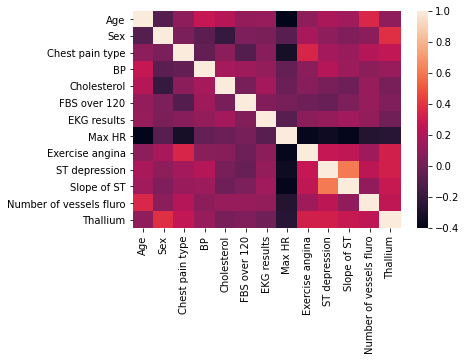

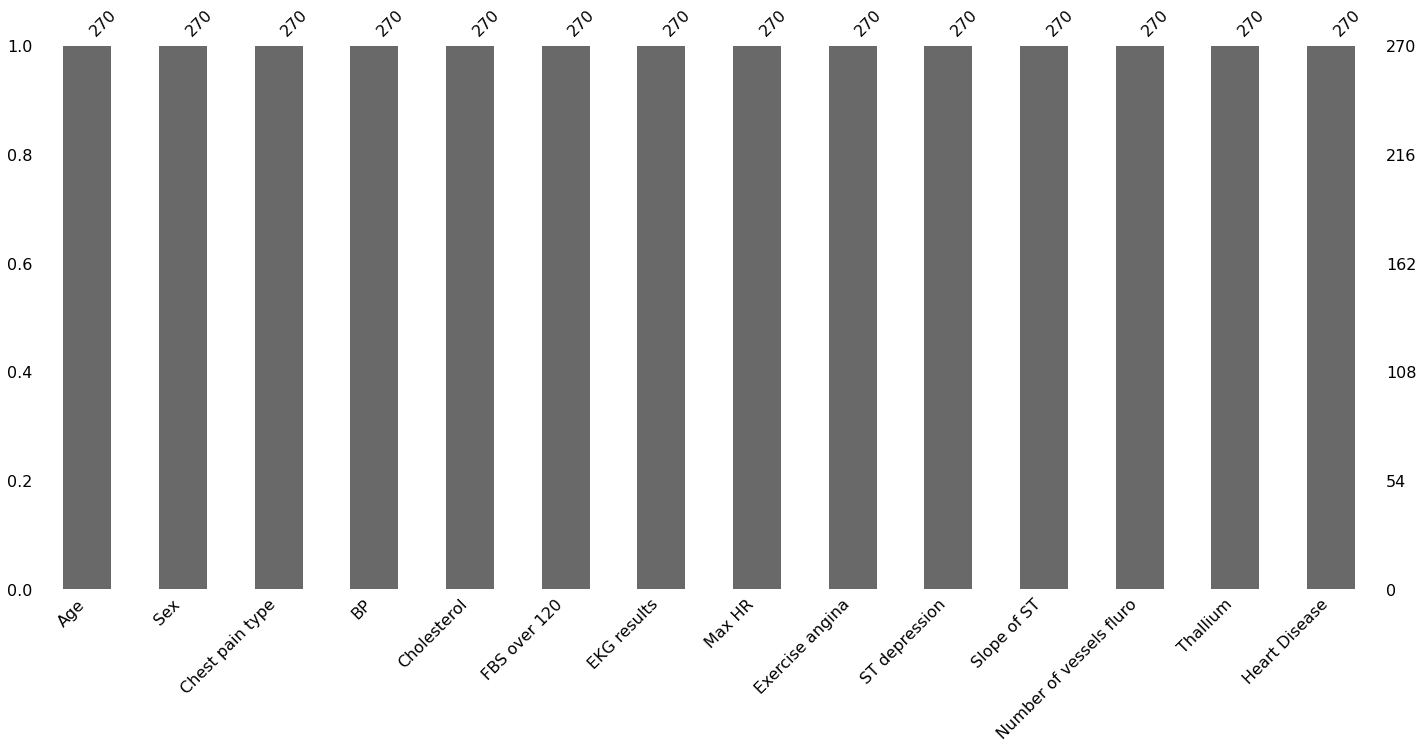

In [64]:
sns.heatmap(df.corr())
df.shape
df.isna().sum()
import missingno as ms 
ms.bar(df)

In [73]:
df.replace(['Presence','Absence'],[1,0], inplace=True)

In [74]:

#setting features and target

X=df.iloc[:,:-1]   #features
Y=df.iloc[:,-1]    #target


In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
#X_test

In [ ]:
# Wrapper Method

In [76]:
#1)Forward Selection
import mlxtend
from mlxtend.frequent_patterns import association_rules
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X_train, Y_train)
all=sfs.k_feature_names_     # to get the final set of features
all=np.array(all)
x_train=X_train[all]
x_test=X_test[all]


In [77]:
#Linear Regression
from sklearn import linear_model
model1= linear_model.LinearRegression()
model1.fit(x_train, Y_train)
pred1=model1.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred1, squared=False)
# report error
print(errors)

0.35323772440937456


In [78]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train, Y_train)
pred2=model2.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred2, squared=False)
# report error
print(errors)

0.3834824944236852


In [79]:
#Gaussian Naive Bayers
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train, Y_train)
pred3=model3.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred3, squared=False)
# report error
print(errors)

0.36380343755449945


In [93]:
#Using Ensemble Learning
final_pred_1=(0.6*pred1+0.2*pred2+0.2*pred3)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, final_pred_1, squared=False)
# report error
print(errors)

0.3313340512518756


In [81]:
# 2.Backward Elimination

sbs = SFS(LinearRegression(),
         k_features=11,
         forward=False,
         floating=False,
         cv=0)
sbs.fit(X_train, Y_train)
all2=sbs.k_feature_names_
all2=np.array(all2)
x_train=X_train[all2]
x_test=X_test[all2]

In [82]:
#Linear Regression
from sklearn import linear_model
model1= linear_model.LinearRegression()
model1.fit(x_train, Y_train)
pred1=model1.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred1, squared=False)
# report error
print(errors)

0.35323772440937456


In [83]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train, Y_train)
pred2=model2.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred2, squared=False)
# report error
print(errors)

0.3834824944236852


In [84]:
#Gaussian Naive Bayers
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train, Y_train)
pred3=model3.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred3, squared=False)
# report error
print(errors)

0.36380343755449945


In [94]:
#Using Ensemble Learning
final_pred_1=(0.6*pred1+0.2*pred2+0.2*pred3)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, final_pred_1, squared=False)
# report error
print(errors)

0.3313340512518756


In [86]:
# 3.Bi-directional Elimination

sffs = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=True,
         cv=0)
sffs.fit(X_train, Y_train)
all3=sffs.k_feature_names_
all3=np.array(all3)
x_train=X_train[all3]
x_test=X_test[all3]


In [87]:
#Linear Regression
from sklearn import linear_model
model1= linear_model.LinearRegression()
model1.fit(x_train, Y_train)
pred1=model1.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred1, squared=False)
# report error
print(errors)

0.35323772440937456


In [88]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train, Y_train)
pred2=model2.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred2, squared=False)
# report error
print(errors)

0.3834824944236852


In [89]:
#Gaussian Naive Bayers
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(x_train, Y_train)
pred3=model3.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred3, squared=False)
# report error
print(errors)

0.36380343755449945


In [95]:
#Using Ensemble Learning
final_pred_1=(0.6*pred1+0.2*pred2+0.2*pred3)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, final_pred_1, squared=False)
# report error
print(errors)

0.3313340512518756


In [116]:
# Filter Method
# 1)Removing Constant Features using VarianceThreshold



from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
#Fit and transforming on train data
data_constant = constant_filter.fit_transform(X_train)
print(data_constant.shape)
#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
#No. of constant columns
print(len(constant_columns))
#Constant columns names:
for column in constant_columns:
    print(column)

(202, 13)
0


In [117]:
#Removing the above-identified constant columns from our dataset
df1 = df.drop(constant_columns,axis=1)
df1.shape

(270, 14)

In [118]:
# 2)Removing Quasi-Constant Features
qcons_filter = VarianceThreshold(threshold=0.01)
#Fit and transforming on train data
data_qcons = qcons_filter.fit_transform(X_train)
print(data_qcons.shape)
#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in X_train.columns
                    if column not in X_train.columns[qcons_filter.get_support()]]
#No. of Quasi constant columns
print(len(qcons_columns))

#Quasi Constant columns names:
for column in qcons_columns:
    print(column)

(202, 13)
0


In [119]:
#Removing above-identified quasi constant columns from our dataset
df1 = df1.drop(qcons_columns,axis=1)
df1.shape

(270, 14)

In [120]:
# 3)Removing Duplicate Columns
# Transposing dataset
df1_t = df1.T
df1_t.shape
#duplicacy in columns
print(df1_t.duplicated().sum())
#Dropping Duplicated method using drop_duplicates()
df1_dup = df1_t.drop_duplicates(keep='first').T
df1_dup.shape

0


(270, 14)

In [121]:
# 4)Correlation of Features with the Target Variable
#removing features with low correlation

corr_matrix=df1.corr()
cor=corr_matrix["Heart Disease"]
cor
df1.columns


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

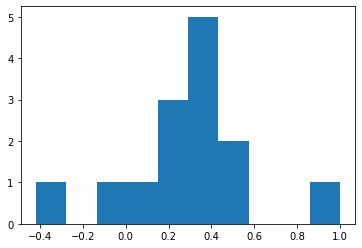

In [122]:
#Plotting for visualization
import matplotlib.pyplot as plt
plt.hist(cor)
plt.show()

In [123]:
# removing features with low correlation
for i in range(len(cor)):
    if np.abs(cor[i])<0.4:
        print(df1.iloc[0,i])
        print(df1.columns[i])




70
Age
1
Sex
130
BP
322
Cholesterol
0
FBS over 120
2
EKG results
2
Slope of ST


In [124]:

df1=df1.drop(["Age","Sex","BP","Cholesterol","FBS over 120","EKG results","Slope of ST"],axis=1);
df1.shape


(270, 7)

In [125]:
# 5) Correlation with other variables
for i in range(0,len(df1.columns)):
    for j in  range(0,len(df1.columns)):
        if i!=j:
            corr_1=np.abs(df1[df1.columns[i]].corr(df1[df1.columns[j]]))
            if corr_1 <0.3:
                print( df1.columns[i] , " is not correlated  with ", df1.columns[j])
            elif corr_1>0.75:
                print( df1.columns[i] , " is highly  correlated  with ", df1.columns[j])


Chest pain type  is not correlated  with  ST depression
Chest pain type  is not correlated  with  Number of vessels fluro
Chest pain type  is not correlated  with  Thallium
Max HR  is not correlated  with  Number of vessels fluro
Max HR  is not correlated  with  Thallium
Exercise angina  is not correlated  with  ST depression
Exercise angina  is not correlated  with  Number of vessels fluro
ST depression  is not correlated  with  Chest pain type
ST depression  is not correlated  with  Exercise angina
ST depression  is not correlated  with  Number of vessels fluro
Number of vessels fluro  is not correlated  with  Chest pain type
Number of vessels fluro  is not correlated  with  Max HR
Number of vessels fluro  is not correlated  with  Exercise angina
Number of vessels fluro  is not correlated  with  ST depression
Number of vessels fluro  is not correlated  with  Thallium
Thallium  is not correlated  with  Chest pain type
Thallium  is not correlated  with  Max HR
Thallium  is not correlat

In [126]:
# features from filter method
all=df1.iloc[:,:-1]
x_train=X_train[all.columns]
x_test=X_test[all.columns]
from sklearn import linear_model
model= linear_model.LinearRegression()
model.fit(x_train, Y_train)
pred=model.predict(x_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred, squared=False)
# report error
print(errors)

0.3474811856620048


In [129]:
#Embeded Methods
#LASSO
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
lasso = LassoCV(cv=skf, random_state=42).fit(X_train,Y_train)
print('Selected Features:', list(df.columns[np.where(lasso.coef_!=0)[0]]))


Selected Features: ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


In [135]:
#Removing not selected features
X3_train=X_train[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']]
X3_test=X_test[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']]


In [136]:
#Linear Regression
from sklearn import linear_model
model1= linear_model.LinearRegression()
model1.fit(X3_train, Y_train)
pred1=model1.predict(X3_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred1, squared=False)
# report error
print(errors)

0.3489489742548141


In [140]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X3_train, Y_train)
pred2=model2.predict(X3_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred2, squared=False)
# report error
print(errors)

0.3834824944236852


In [141]:
#Gaussian Naive Bayers
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X3_train, Y_train)
pred3=model3.predict(X3_test)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, pred3, squared=False)
# report error
print(errors)

0.3834824944236852


In [142]:
#Using Ensemble Learning
final_pred_1=(0.6*pred1+0.2*pred2+0.2*pred3)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(Y_test, final_pred_1, squared=False)
# report error
print(errors)

0.32931137336964356
